# 1-1 category별로 여러 편의시설 설치된 곳을 찾기

In [1]:
import pandas as pd

In [2]:
import pdvega

In [3]:
import matplotlib.pyplot as plt

In [4]:
%matplotlib notebook

In [5]:
%matplotlib inline

In [6]:
from matplotlib import font_manager, rc
path = 'c:/windows/fonts/NanumGothic.ttf'
font_name = font_manager.FontProperties(fname=path).get_name()
rc('font', family=font_name)

In [7]:
test = pd.read_csv('../table_dataclean.csv')

In [8]:
graph1 = test.groupby('category').facility_available_name.count()

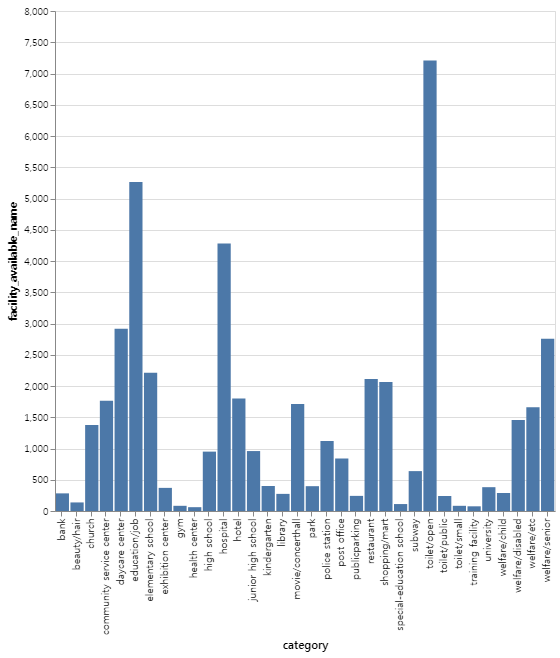

In [9]:
graph1.vgplot.bar(width = 500, height=500,interactive=False)

# category별로 편의시설 유형 파악

In [ ]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [ ]:
test.category.unique()

In [ ]:
len(test.category.unique())

In [ ]:
test[test.category=='subway'].groupby('facility_available_name').facility_id.count()

In [ ]:
graph2 = []
for result in test.category.unique():
    graph2.append(test[test.category ==  result].groupby('facility_available_name').facility_id.count())
    

In [ ]:
for i, result in enumerate(test.category.unique()):
    print(result)
    graph2[i].vgplot.bar( width = 300, height=300,interactive = False)

In [9]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46525 entries, 0 to 46524
Data columns (total 10 columns):
Unnamed: 0                 46525 non-null int64
category                   46525 non-null object
lat                        46525 non-null float64
lon                        46525 non-null float64
place_address              45879 non-null object
place_id                   46525 non-null int64
place_name                 46525 non-null object
facility_available_name    46525 non-null object
facility_is_available      15032 non-null object
facility_id                46525 non-null int64
dtypes: float64(2), int64(3), object(5)
memory usage: 3.5+ MB


In [10]:
test.place_address.isna().sum()

646

In [11]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46525 entries, 0 to 46524
Data columns (total 10 columns):
Unnamed: 0                 46525 non-null int64
category                   46525 non-null object
lat                        46525 non-null float64
lon                        46525 non-null float64
place_address              45879 non-null object
place_id                   46525 non-null int64
place_name                 46525 non-null object
facility_available_name    46525 non-null object
facility_is_available      15032 non-null object
facility_id                46525 non-null int64
dtypes: float64(2), int64(3), object(5)
memory usage: 3.5+ MB


In [12]:
ttest = test.copy()

In [13]:
ttest.place_address.isna().sum()

646

In [14]:
ttest.place_id.isna().sum()

0

In [15]:
ttest.isna().any()

Unnamed: 0                 False
category                   False
lat                        False
lon                        False
place_address               True
place_id                   False
place_name                 False
facility_available_name    False
facility_is_available       True
facility_id                False
dtype: bool

In [16]:
ttest.isna().sum()

Unnamed: 0                     0
category                       0
lat                            0
lon                            0
place_address                646
place_id                       0
place_name                     0
facility_available_name        0
facility_is_available      31493
facility_id                    0
dtype: int64

In [17]:
ttest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46525 entries, 0 to 46524
Data columns (total 10 columns):
Unnamed: 0                 46525 non-null int64
category                   46525 non-null object
lat                        46525 non-null float64
lon                        46525 non-null float64
place_address              45879 non-null object
place_id                   46525 non-null int64
place_name                 46525 non-null object
facility_available_name    46525 non-null object
facility_is_available      15032 non-null object
facility_id                46525 non-null int64
dtypes: float64(2), int64(3), object(5)
memory usage: 3.5+ MB


In [18]:
import numpy as np

In [19]:
ttest[ttest.place_address.isna()].category.count()

646

In [20]:
import pickle

In [25]:
with open('subway_Gu_list.letsugirit', 'rb') as file:    # 확장자 마음대로 하지만 b를 붙여야함 바이너리이니까. 객체는 텍스트가아니니까. 
    sub_gu_series = pickle.load(file)

In [27]:
sub_gu_se = pd.Series(sub_gu_series)

In [28]:
print(sub_gu_se)

0       송파구
1       금천구
2       남동구
3       강남구
4       강남구
5       강동구
6       강동구
7       광진구
8       광진구
9       구로구
10      강서구
11      송파구
12      광진구
13     null
14      종로구
15      강동구
16      성북구
17      서초구
18      단원구
19      단원구
20      마포구
21      노원구
22     null
23      만안구
24      광진구
25     null
26      종로구
27      마포구
28      서초구
29      구로구
       ... 
294      중구
295     강남구
296    동대문구
297     동작구
298     동작구
299      중구
300    서대문구
301     노원구
302     동안구
303    null
304     노원구
305     강남구
306     강남구
307     용산구
308     상록구
309     성북구
310     성동구
311     마포구
312     성동구
313     종로구
314     마포구
315    서대문구
316     강서구
317     노원구
318     팔달구
319     덕양구
320    동대문구
321    null
322      중구
323     용산구
Length: 324, dtype: object


In [139]:
# ttest.dropna(inplace=True,subset={'place_address'})

In [140]:
ttest.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45879 entries, 638 to 46516
Data columns (total 10 columns):
Unnamed: 0                 45879 non-null int64
category                   45879 non-null object
lat                        45879 non-null float64
lon                        45879 non-null float64
place_address              45879 non-null object
place_id                   45879 non-null int64
place_name                 45879 non-null object
facility_available_name    45879 non-null object
facility_is_available      14386 non-null object
facility_id                45879 non-null int64
dtypes: float64(2), int64(3), object(5)
memory usage: 3.9+ MB


In [141]:
ttest.isna().sum()

Unnamed: 0                     0
category                       0
lat                            0
lon                            0
place_address                  0
place_id                       0
place_name                     0
facility_available_name        0
facility_is_available      31493
facility_id                    0
dtype: int64

In [142]:
## 어드레스없는거는 모드 드롭함.

In [143]:
ttest.head()

,Unnamed: 0,category,lat,lon,place_address,place_id,place_name,facility_available_name,facility_is_available,facility_id
638,638,movie/concerthall,37.583269,127.002443,서울특별시 종로구 동숭동 1-37,10000,A아트홀(구.신연아트홀),주출입구 접근로,이용불편,100000
639,639,movie/concerthall,37.583269,127.002443,서울특별시 종로구 동숭동 1-37,10000,A아트홀(구.신연아트홀),주출입구 높이차이 제거,이용가능,100001
640,640,movie/concerthall,37.523930,127.025143,서울특별시 강남구 신사동 568-2,10001,BBC씨어터,주출입구 접근로,이용가능,100002
641,641,movie/concerthall,37.523930,127.025143,서울특별시 강남구 신사동 568-2,10001,BBC씨어터,장애인 전용 주차구역,이용가능,100003
642,642,movie/concerthall,37.523930,127.025143,서울특별시 강남구 신사동 568-2,10001,BBC씨어터,주출입구 높이차이 제거,이용가능,100004


In [153]:
ttest.place_address.str.contains('구 ').sum()

45879

In [27]:
#ttest.loc[45005, ['place_address'] ]

In [28]:
# ttest.iloc[45005]['place_address'] = '서울특별시 강동구 둔촌동 산6'

In [29]:
#ttest.loc[45005, ['place_address'] ]

In [156]:
for i,v in enumerate(ttest.place_address.str.split(' ')):
    if not v[1].endswith('구'):
        print(i,v)

In [32]:
ttest.head()

,Unnamed: 0,category,lat,lon,place_address,place_id,place_name,facility_available_name,facility_is_available,facility_id,Gu
638,638,movie/concerthall,37.583269,127.002443,서울특별시 종로구 동숭동 1-37,10000,A아트홀(구.신연아트홀),주출입구 접근로,이용불편,100000,
639,639,movie/concerthall,37.583269,127.002443,서울특별시 종로구 동숭동 1-37,10000,A아트홀(구.신연아트홀),주출입구 높이차이 제거,이용가능,100001,
640,640,movie/concerthall,37.523930,127.025143,서울특별시 강남구 신사동 568-2,10001,BBC씨어터,주출입구 접근로,이용가능,100002,
641,641,movie/concerthall,37.523930,127.025143,서울특별시 강남구 신사동 568-2,10001,BBC씨어터,장애인 전용 주차구역,이용가능,100003,
642,642,movie/concerthall,37.523930,127.025143,서울특별시 강남구 신사동 568-2,10001,BBC씨어터,주출입구 높이차이 제거,이용가능,100004,


In [34]:
ttest.place_address.str.split(' ').head()

638       [서울특별시, 종로구, 동숭동, 1-37]
639       [서울특별시, 종로구, 동숭동, 1-37]
640    [서울특별시, 강남구, 신사동, , 568-2]
641    [서울특별시, 강남구, 신사동, , 568-2]
642    [서울특별시, 강남구, 신사동, , 568-2]
Name: place_address, dtype: object

In [157]:
gu_list = [] 

In [158]:
for i,v in enumerate(ttest.place_address.str.split(' ')):
    gu_list.append(v[1])

In [159]:
len(gu_list)

45879

In [119]:
gu_list[0]

'종로구'

In [160]:
se= pd.Series(gu_list)

In [161]:
ttest.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45879 entries, 638 to 46516
Data columns (total 10 columns):
Unnamed: 0                 45879 non-null int64
category                   45879 non-null object
lat                        45879 non-null float64
lon                        45879 non-null float64
place_address              45879 non-null object
place_id                   45879 non-null int64
place_name                 45879 non-null object
facility_available_name    45879 non-null object
facility_is_available      14386 non-null object
facility_id                45879 non-null int64
dtypes: float64(2), int64(3), object(5)
memory usage: 3.9+ MB


In [162]:
len(se.values)

45879

In [163]:
ttest['Gu'] = se.values

In [164]:
ttest.head()

,Unnamed: 0,category,lat,lon,place_address,place_id,place_name,facility_available_name,facility_is_available,facility_id,Gu
638,638,movie/concerthall,37.583269,127.002443,서울특별시 종로구 동숭동 1-37,10000,A아트홀(구.신연아트홀),주출입구 접근로,이용불편,100000,종로구
639,639,movie/concerthall,37.583269,127.002443,서울특별시 종로구 동숭동 1-37,10000,A아트홀(구.신연아트홀),주출입구 높이차이 제거,이용가능,100001,종로구
640,640,movie/concerthall,37.523930,127.025143,서울특별시 강남구 신사동 568-2,10001,BBC씨어터,주출입구 접근로,이용가능,100002,강남구
641,641,movie/concerthall,37.523930,127.025143,서울특별시 강남구 신사동 568-2,10001,BBC씨어터,장애인 전용 주차구역,이용가능,100003,강남구
642,642,movie/concerthall,37.523930,127.025143,서울특별시 강남구 신사동 568-2,10001,BBC씨어터,주출입구 높이차이 제거,이용가능,100004,강남구


In [166]:
graph1 = ttest.groupby('Gu').facility_available_name.count()

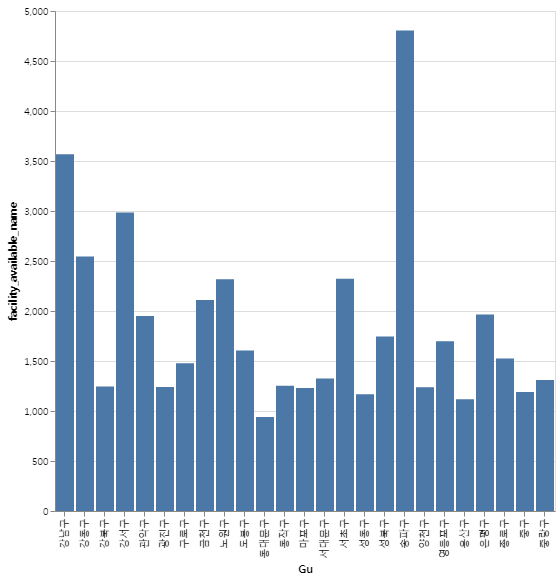

In [167]:
graph1.vgplot.bar(width = 500, height=500,interactive=False)

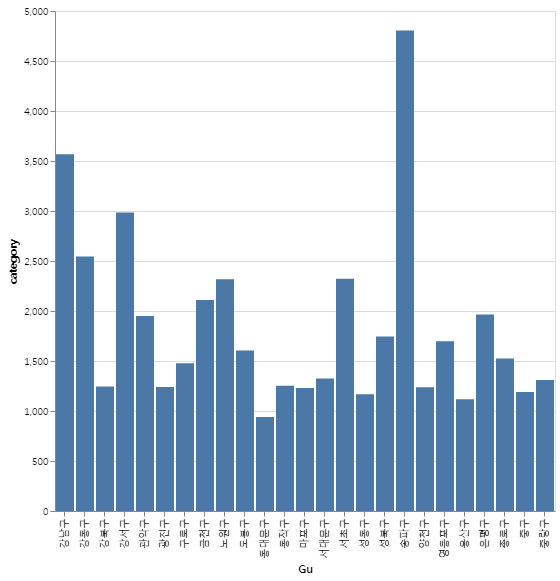

In [174]:
graph2.vgplot.bar(width = 500, height=500,interactive=False)

In [169]:
ttest.to_csv('clean_table_with_gu.csv')

In [170]:
ttest.head()

,Unnamed: 0,category,lat,lon,place_address,place_id,place_name,facility_available_name,facility_is_available,facility_id,Gu
638,638,movie/concerthall,37.583269,127.002443,서울특별시 종로구 동숭동 1-37,10000,A아트홀(구.신연아트홀),주출입구 접근로,이용불편,100000,종로구
639,639,movie/concerthall,37.583269,127.002443,서울특별시 종로구 동숭동 1-37,10000,A아트홀(구.신연아트홀),주출입구 높이차이 제거,이용가능,100001,종로구
640,640,movie/concerthall,37.523930,127.025143,서울특별시 강남구 신사동 568-2,10001,BBC씨어터,주출입구 접근로,이용가능,100002,강남구
641,641,movie/concerthall,37.523930,127.025143,서울특별시 강남구 신사동 568-2,10001,BBC씨어터,장애인 전용 주차구역,이용가능,100003,강남구
642,642,movie/concerthall,37.523930,127.025143,서울특별시 강남구 신사동 568-2,10001,BBC씨어터,주출입구 높이차이 제거,이용가능,100004,강남구


In [ ]:
from bokeh.io import show, output_file
from bokeh.models import ColumnDataSource
from bokeh.palettes import Spectral6
from bokeh.plotting import figure
from bokeh.transform import factor_cmap

output_file("bar_colormapped.html")

fruits = ['Apples', 'Pears', 'Nectarines', 'Plums', 'Grapes', 'Strawberries']
counts = [5, 3, 4, 2, 4, 6]

source = ColumnDataSource(data=graph2[0])

p = figure( plot_height=350, toolbar_location=None, title="Fruit Counts")
# p.vbar(x='fruits', top='counts', width=0.9, source=graph2[0], legend="fruits",
#        line_color='white', fill_color=factor_cmap('fruits', palette=Spectral6, factors=fruits))

p.xgrid.grid_line_color = None
p.y_range.start = 0
p.y_range.end = 9
p.legend.orientation = "horizontal"
p.legend.location = "top_center"

show(p)

In [ ]:
source